**Question 1: Prep the data in order to be ready to be fed to a model. Look for missing, null, NaN records.
Find outliers. Transform data – all entries should be numeric.**



**Importing of Libraries**



In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [142]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

**Extracting the Data File**

In [145]:
Dataset = "telco-customer-churn.csv"
dataset = pd.read_csv(Dataset)

In [147]:
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [149]:
dataset.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


**Data Wrangling**

**Handling Missing Data**

In [153]:
#Calculating the number of missing data in each column and printing the same
dataset.isnull().sum()
for column in dataset.columns:
    print(column)
    print(dataset[column].isnull().sum())

customerID
0
gender
0
SeniorCitizen
0
Partner
0
Dependents
0
tenure
0
PhoneService
0
MultipleLines
0
InternetService
0
OnlineSecurity
0
OnlineBackup
0
DeviceProtection
0
TechSupport
0
StreamingTV
0
StreamingMovies
0
Contract
0
PaperlessBilling
0
PaymentMethod
0
MonthlyCharges
0
TotalCharges
0
Churn
0


**Outliers**

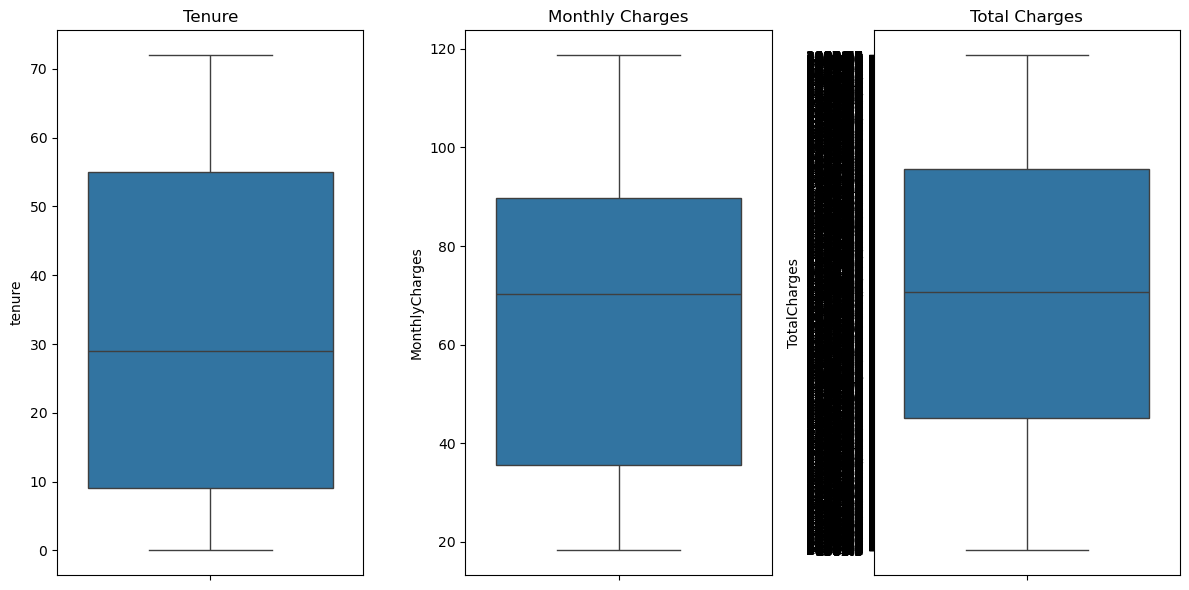

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for each numeric column
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(dataset['tenure'])
plt.title('Tenure')

plt.subplot(1, 3, 2)
sns.boxplot(dataset['MonthlyCharges'])
plt.title('Monthly Charges')

plt.subplot(1, 3, 3)
sns.boxplot(dataset['TotalCharges'])
plt.title('Total Charges')

plt.tight_layout()
plt.show()

**Question 2: Listing all types of data, numeric, categorical, text**

In [159]:
# Identify numeric columns
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns (usually object type in pandas)
categorical_columns = dataset.select_dtypes(include=['object']).columns.tolist()

# If there are any text columns (which are also often 'object'), you can refine them here
# Check if any categorical columns are actually text
text_columns = [col for col in categorical_columns if dataset[col].str.contains('[A-Za-z]', na=False).any()]

# Now remove text columns from categorical
categorical_columns = [col for col in categorical_columns if col not in text_columns]

# Display the lists
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)
print("Text Columns:", text_columns)

Numeric Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical Columns: ['TotalCharges']
Text Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


**Checking Data Format**

In [162]:
#Checking the data types for each column
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [164]:
# Convert binary columns to numeric
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
dataset[binary_columns] = dataset[binary_columns].replace({'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1})

/var/folders/7n/x1z2sc314cd0pzfqk8dxtvlr0000gn/T/ipykernel_57872/1826192014.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[binary_columns] = dataset[binary_columns].replace({'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1})


In [166]:
# Convert multi-class categorical columns to numeric codes
categorical_columns = ['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies']
for column in categorical_columns:
    dataset[column] = dataset[column].astype('category').cat.codes

In [168]:
# Convert 'TotalCharges' to numeric
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

In [170]:
# Check the data types
print(dataset.dtypes)

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines          int8
InternetService        int8
OnlineSecurity         int8
OnlineBackup           int8
DeviceProtection       int8
TechSupport            int8
StreamingTV            int8
StreamingMovies        int8
Contract               int8
PaperlessBilling      int64
PaymentMethod          int8
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [172]:
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [174]:
dataset.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,0,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,2234-XADUH,1,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,4801-JZAZL,1,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,0,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1
7042,3186-AJIEK,0,0,0,0,66,1,0,1,2,...,2,2,2,2,2,1,0,105.65,6844.50,0


In [176]:
for column in categorical_columns:
    dataset[column] = dataset[column].astype('category')

In [178]:
print(dataset.dtypes)

customerID            object
gender                 int64
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling       int64
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
dtype: object


In [180]:
# Identify numeric columns
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns (usually object type in pandas)
categorical_columns = dataset.select_dtypes(include=['category']).columns.tolist()

# If there are any text columns (which are also often 'object')
text_columns = dataset.select_dtypes(include=['object']).columns.tolist()

# Display the lists
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)
print("Text Columns:", text_columns)

Numeric Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']
Categorical Columns: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
Text Columns: ['customerID']


In [182]:
import seaborn as sns
from sklearn.model_selection import train_test_split

**Question 3: Perform EDA. Present dependencies and correlations among the various features in the data.
List the most important variables (Feature Importance) that will affect the target label.**

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


/var/folders/7n/x1z2sc314cd0pzfqk8dxtvlr0000gn/T/ipykernel_57872/502216208.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Churn', palette='Set2')


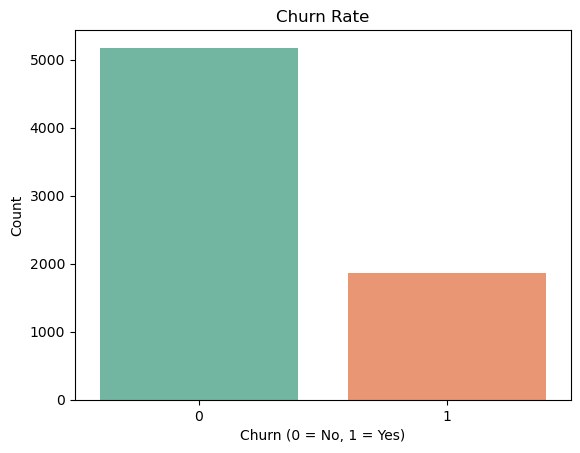

In [185]:
# Calculate churn rate
churn_rate = dataset['Churn'].value_counts(normalize=True)
print(churn_rate)

# Visualize churn rate
sns.countplot(data=dataset, x='Churn', palette='Set2')
plt.title('Churn Rate')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [187]:
data_numeric = dataset.drop(columns=['customerID'])  # Drop non-numeric identifiers

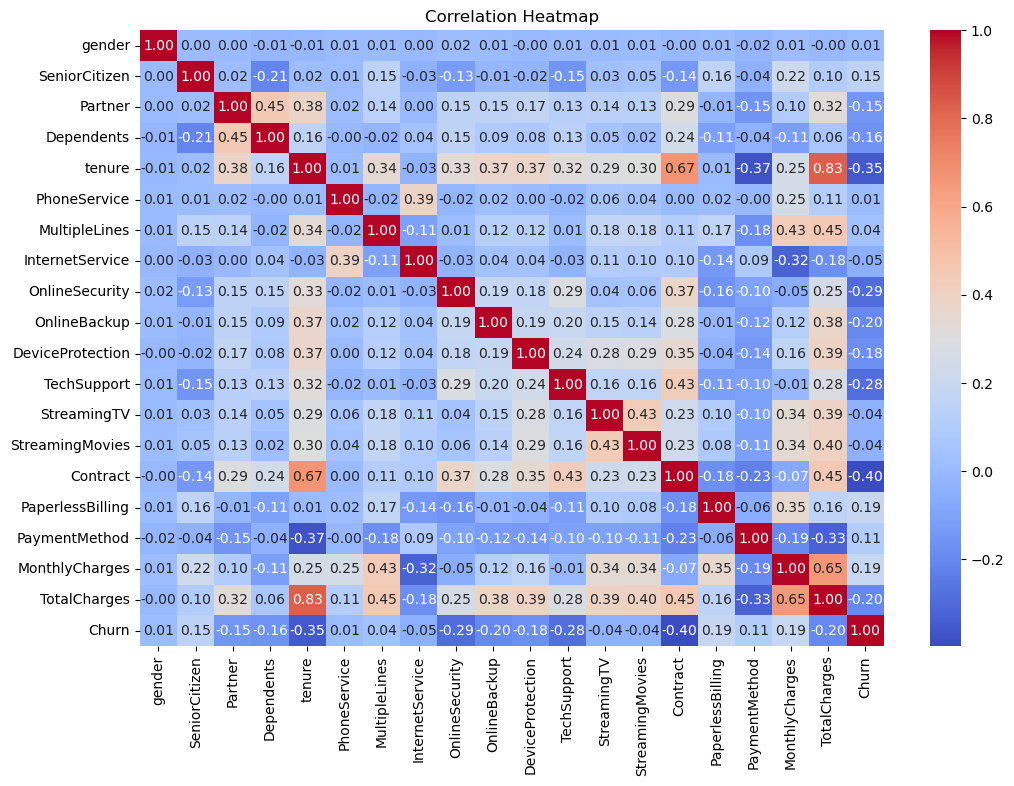

In [189]:
# Correlation matrix
corr = data_numeric.corr()
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [191]:
# Calculate the correlation coefficients with 'Churn'
correlation_with_churn = corr['Churn'].sort_values(ascending=False)
print("Correlation with Churn:")
print(correlation_with_churn)

Correlation with Churn:
Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender              0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199484
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


**Positive Correlations: MonthlyCharges: 0.193; PaperlessBilling: 0.192; SeniorCitizen: 0.151**

**Question 4: Split the dataset into training and test datasets (80/20 ratio). Using SweetViz’s ‘compare’
command contrast the training vs test datasets on the target (‘churn’)**

In [195]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [197]:
from sklearn.model_selection import train_test_split
import sweetviz as sv

In [199]:
# Define the features (X) and the target (y)
X = dataset.drop(columns=['Churn'])  # Drop the 'Churn' column
y = dataset['Churn']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Combine the training and test data back with their respective labels for SweetViz
train_data = X_train.copy()
train_data['Churn'] = y_train

test_data = X_test.copy()
test_data['Churn'] = y_test

In [201]:
# Create the comparison report using SweetViz
comparison_report = sv.compare([train_data, "Training Set"], [test_data, "Test Set"], "Churn")

# Display the report in an HTML file
comparison_report.show_html("sweetviz_comparison_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_comparison_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Pandas Profiling**

In [204]:
pip install pandas-profiling

  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.6
    Uninstalling visions-0.7.6:
      Successfully uninstalled visions-0.7.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.10.0 requires visions[type_image_path]<0.7.7,>=0.7.5, but you have visions 0.7.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [206]:
pip install ydata-profiling

  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.7.6-py3-none-any.whl (104 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [208]:
from ydata_profiling import ProfileReport

In [210]:
# Create the profile report
profile = ProfileReport(dataset, title="Telco Customer Churn - Pandas Profiling Report", explorative=True)

# Save the report as an HTML file
profile.to_file("ydata_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [238]:
data = data_numeric#Encode categorical variables

# Detect and replace invalid entries (empty strings) with NaN
data.replace(' ', np.nan, inplace=True)

categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                       'PhoneService', 'InternetService', 'Contract', 'PaymentMethod',
                       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Ensure the target column is numeric
data['Churn'] = le.fit_transform(data['Churn'])

#Handle missing values with imputation (fill missing numeric values)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(data.drop(['Churn'], axis=1))  # Impute missing values

#Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)#Handle missing values with imputation (fill missing numeric values)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(data.drop(['Churn'], axis=1))  # Impute missing values

#Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


#Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data['Churn'], test_size=0.2, random_state=42)

**Question 5: State limitations/issues (if any) with the given dataset.**

An imbalance in class within the target variable, churn: Problem: The dataset frequently exhibits an unbalanced distribution of churned and non-churned clients. Customers who stay are usually significantly more numerous than those who churn. This disparity may result in skewed models that perform poorly on the minority class (churn) but more accurately anticipate the majority class (non-churn). Impact: For the minority class (churners), in particular, it might have an impact on how accurate churn projections are.

Existence of Classification Variables: Problem: The dataset contains a large number of categorical characteristics, including InternetService, Contract, and PaymentMethod. For the purpose of machine learning models, these categorical features must be converted into numerical form, which can be complex and requires cautious handling (e.g., one-hot encoding, label encoding). Impact: Inadequate encoding may result in cause loss of information or multicollinearity, which impacts the performance of the model.

Possible Redundancy and Limited Variability in Certain Aspects: Problem: Certain features, such as MultipleLines and PhoneService, may have extremely low variability (e.g., the majority of consumers may have phone service). Low variability features may add noise to the model and have minimal impact on churn prediction. Impact: To make the model simpler and easier to understand, some characteristics that aren't as informative might be eliminated.


**Project 2**

**--> Original Dataset (without SMOTE)**

In [218]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [240]:
# Train the models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
nb = GaussianNB()
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(random_state=42)
xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train models
nb.fit(X_train, y_train)
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgboost = xgboost.predict(X_test)

# Evaluate models
def evaluate_model(y_test, y_pred):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

# Naive Bayes Performance
print("Naive Bayes Performance:")
evaluate_model(y_test, y_pred_nb)

# Logistic Regression Performance
print("\nLogistic Regression Performance:")
evaluate_model(y_test, y_pred_lr)

# Random Forest Performance
print("\nRandom Forest Performance:")
evaluate_model(y_test, y_pred_rf)

# XGBoost Performance
print("\nXGBoost Performance:")
evaluate_model(y_test, y_pred_xgboost)

Naive Bayes Performance:
Accuracy: 0.7579843860894251
Precision: 0.5293040293040293
Recall: 0.774798927613941
F1 Score: 0.6289445048966268

Logistic Regression Performance:
Accuracy: 0.8161816891412349
Precision: 0.678125
Recall: 0.5817694369973191
F1 Score: 0.6262626262626263

Random Forest Performance:
Accuracy: 0.794180269694819
Precision: 0.6531365313653137
Recall: 0.4745308310991957
F1 Score: 0.5496894409937888

XGBoost Performance:
Accuracy: 0.7821149751596878
Precision: 0.6078431372549019
Recall: 0.49865951742627346
F1 Score: 0.5478645066273933


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:35:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**--> SMOTE**

In [243]:
from imblearn.over_sampling import SMOTE

In [245]:
# Apply SMOTE to handle class imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

In [257]:
# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train the models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
nb = GaussianNB()
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(random_state=42)
xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train models
nb.fit(X_train, y_train)
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgboost = xgboost.predict(X_test)

# Evaluate models
def evaluate_model(y_test, y_pred):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

# Naive Bayes Performance
print("Naive Bayes Performance:")
evaluate_model(y_test, y_pred_nb)

# Logistic Regression Performance
print("\nLogistic Regression Performance:")
evaluate_model(y_test, y_pred_lr)

# Random Forest Performance
print("\nRandom Forest Performance:")
evaluate_model(y_test, y_pred_rf)

# XGBoost Performance
print("\nXGBoost Performance:")
evaluate_model(y_test, y_pred_xgboost)

Naive Bayes Performance:
Accuracy: 0.7734299516908213
Precision: 0.7603231597845601
Recall: 0.8074356530028599
F1 Score: 0.7831715210355987

Logistic Regression Performance:
Accuracy: 0.7942028985507247
Precision: 0.7744493392070485
Recall: 0.8379408960915157
F1 Score: 0.804945054945055

Random Forest Performance:
Accuracy: 0.8603864734299517
Precision: 0.8625954198473282
Recall: 0.8617731172545281
F1 Score: 0.8621840724845017

XGBoost Performance:
Accuracy: 0.8507246376811595
Precision: 0.8477443609022557
Recall: 0.8598665395614872
F1 Score: 0.8537624230951254


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:43:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--> Model Tuning (Hyperparameters Tuning)

In [260]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

# Randomized search for Random Forest
param_distributions_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions_rf,
                                      n_iter=10, cv=3, n_jobs=-1, verbose=2, scoring='recall', random_state=42)

random_search_rf.fit(X_train, y_train)

# Best parameters for Random Forest
print("Best parameters for Random Forest:")
print(random_search_rf.best_params_)

# Evaluate Random Forest after tuning
best_rf = random_search_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)

print("\nTuned Random Forest Performance:")
evaluate_model(y_test, y_pred_rf_tuned)


# Randomized search for XGBoost
param_distributions_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgboost = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost, param_distributions=param_distributions_xgb,
                                       n_iter=10, cv=2, n_jobs=-1, verbose=2, scoring='recall', random_state=42)

random_search_xgb.fit(X_train, y_train)

# Best parameters for XGBoost
print("Best parameters for XGBoost:")
print(random_search_xgb.best_params_)

# Evaluate XGBoost after tuning
best_xgb = random_search_xgb.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)

print("\nTuned XGBoost Performance:")
evaluate_model(y_test, y_pred_xgb_tuned)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.8s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.8s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.9s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.9s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   

In [265]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

param_distributions_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

gnb = GaussianNB()
random_search_gnb = RandomizedSearchCV(estimator=gnb, param_distributions=param_distributions_gnb, 
                                       n_iter=5, cv=3, n_jobs=-1, scoring='accuracy', random_state=42)
random_search_gnb.fit(X_train, y_train)

# Best parameters for GaussianNB
print("Best parameters for Gaussian Naïve Bayes:", random_search_gnb.best_params_)

Best parameters for Gaussian Naïve Bayes: {'var_smoothing': 1e-09}


In [273]:
# Instantiate GaussianNB with the best parameter
best_gnb = GaussianNB(var_smoothing=1e-09)

# Fit the model on the training data
best_gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gnb_tuned = best_gnb.predict(X_test)

# Evaluate the tuned Gaussian Naïve Bayes model
print("\nTuned Gaussian Naïve Bayes Performance:")
evaluate_model(y_test, y_pred_gnb_tuned)


Tuned Gaussian Naïve Bayes Performance:
Accuracy: 0.7734299516908213
Precision: 0.7603231597845601
Recall: 0.8074356530028599
F1 Score: 0.7831715210355987


In [271]:
# Define a parameter distribution to avoid incompatible combinations
param_distributions_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],   # Exclude 'none'
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [0.1, 0.5, 0.9]              # Only used with 'elasticnet'
}

# Create a custom function to filter out incompatible parameter combinations
def custom_param_distributions():
    for penalty in ['l1', 'l2', 'elasticnet']:
        for solver in ['liblinear', 'saga']:
            if penalty == 'elasticnet' and solver != 'saga':
                continue
            if penalty != 'elasticnet' and solver == 'saga':
                yield {'C': [0.01, 0.1, 1, 10, 100], 'penalty': [penalty], 'solver': [solver]}
            elif penalty == 'elasticnet' and solver == 'saga':
                yield {'C': [0.01, 0.1, 1, 10, 100], 'penalty': [penalty], 'solver': [solver], 'l1_ratio': [0.1, 0.5, 0.9]}

# Instantiate and execute RandomizedSearchCV with filtered parameters
lr = LogisticRegression(max_iter=300, random_state=42)
random_search_lr = RandomizedSearchCV(estimator=lr, param_distributions=list(custom_param_distributions()), 
                                      n_iter=10, cv=3, n_jobs=-1, scoring='accuracy', random_state=42)

random_search_lr.fit(X_train, y_train)

# Display best parameters
print("Best parameters for Logistic Regression:", random_search_lr.best_params_)


Best parameters for Logistic Regression: {'solver': 'saga', 'penalty': 'l2', 'C': 0.01}
